# Encoding Categorical Variables: The Rainbow Method
> The Benefits of Rejecting One-hot and Finding Rainbows

- author: Anna Arakelyan, Dmytro Karabash
- categories: [python, data science, classification, encoding]
- image: 
- permalink: 
- hide: false

## Introduction

Data encoding is the crucial part of any data science pipeline. No matter what is the final goal or which machine learning algorithm will be used - there is no avoiding of data massaging, cleaning, and encoding. Given that real data sets are rarely as clean and suited for analysis as toy data sets from data science classes, there is a number of decisions you have to make to encode and engineer features in the most appropriate and efficient way.
While the encoding of quantitative and binary columns is generally straightforward, the encoding of categorical variables deserves a deeper look. 
<br><br>
One of the most popular encoding methods for categorical variables has been the One-Hot procedure. It generates an indicator variable for every category and, thus, creates a set of K new features, where K is the number of categories.
One significant implication of this method is the dimensionality increase. Depending on the magnitude of K, it can have various undesirable technical consequences: substantial raise of computational complexity, loss of degrees of freedom (N-K, where N is the number of samples), multicollinearity, and, ultimately, an overfitted model. Non-technical consequences include unnecessary complication of the model that should be communicated to final users and that contradict the law of parsimony, also known as Occam's razor.

## What is a Rainbow?

Instead of One-Hot, we propose an alternative way to encode categorical variables. Imagine that instead of K features you would make only one. The trick is to treat categorical variables as quantitative and find a certain way to order categories. 

>Important note here: this method is highly efficient in conjunction with the models that rely on variables as ranks rather than exact values. For example, decision trees, random forest, gradient boosting - these algorithms will output the same result if the variable *Number of Children* is coded as [1, 2, 3, 4, 5, ...] or as [-100, -85, 0, 10, 44, ...] as long as the categories have a correct order, and we use correct interpretation of non-meaningful values.
The application of our method for other algorithms such as Linear Regression, Logistic Regression is out of scope of this article. We expect that such way of feature engineering would be still beneficial, but this is a subject of a different investigation.

The application of our method depends highly on the level of measurement. While **quantitative** variables have a *ratio* scale, i.e. they have a meaningful 0, ordered values, and equal distances between values; **categorical** variables usually have either *interval*, or *ordinal*, or *nominal* scales.
Let us illustrate our method for each of these types of categorical variables.

**Interval** variables have ordered values, equal distances between values, but the value itself is not necessarily meaningful, for example, 0 does not always mean a complete absence of a quality. The common examples of interval variables are Likert scales:
<br>
***
"How likely is the person to buy a smartphone mobile phone?" 
<br>
1 = Very Unlikely <br>
2 = Somewhat Unlikely<br>
3 = Neither Likely, Nor Unlikely<br>
4 = Somewhat Likely<br>
5 = Very Likely
***

In a straightforward way, if we simply use the raw values 1 through 5, that will save us dimensionality without losing a single bit of information. Indeed, the algorithm such as *xgboost* will make splits on this scale to introduce a new node any number of times it finds the best, instead of being forced to use the splits predetermined by One-Hot. With a large K, the algorithm would be forced into using big number of predermined splits which might be simply an overfit.

**Ordinal** variables have ordered values that are meaningless, and the distances between values are also not equal or not even explainable. An example: <br>
***
"What is the highest level of Education completed by the person?"
<br>
1 = No High School<br>
2 = High School <br>
3 = Associate Degree <br>
4 = Bachelor's Degree <br>
5 = Master's Degree <br>
6 = Doctoral Degree <br>
***

Similar to interval variables, ordinal numeric codes can be used in the model without introducing any challenges, as long as the order is correct. In some cases, a variable is intrinsically ordinal, but the given numeric codes are not in the correct order - in these situations we could simply reorder categories and then use this updated variable as a quantitative feature.

Interval and ordinal categorical variables are probably not raising concerns as they are clearly perfect alternative to One-Hot for tree-based algorithms. The more complicated and non-obvious question is how to treat nominal variables.

**Nominal** variables have no obvious order between categories, and are almost always encoded with One-Hot method. A nice example of a nominal variable is
***
"Color" <br>
(For instance, which color marker a person have chosen in some psychological state)
<br>
A = Red <br>
B = Blue <br>
C = Green <br>
D = Yellow <br>
***

From the first glance it seems like we can't convert this variable to a quantitative scale. This is where our proposed method will help! We suggest **finding a rainbow**.

These seemingly unordered categories acquire a perfect order if we find a certain scale where each category fits into a unique place. With the color, such scale could be the Hue! In other words, the wavelength of the light is the factor the helps us order the colors into a perfect scale - a rainbow! So, following that logic, we would engineer a new feature:
***
1 = Blue <br>
2 = Green<br>
3 = Yellow<br>
4 = Red<br>
***

The Hue is not the only way to order the colors. We could think of a few different scales, such as brightness, saturation, color temperature, lightness, etc. We invite you to experiment with a few different "rainbows" that might capture different nuances of the categorical quality. <br>Note that by using a rainbow rather than One-Hot we are not losing any of the signal, because, even if the categories are wildly different and each one introduces a substantial gain to the model, the algorithm such as *xgboost* would capture that by making all the needed splits when introducing new tree nodes.

Lets us show a few other examples of creating rainbows.

***
"Marital Status" <br>
A = Married <br>
B = Single <br>
C = Inferred Married <br>
D = Inferred Single <br>
***

If we think about Single and Married as the two ends of the spectrum, then Inferred Single could be between the two, closer to Single while Inferred Married between the two closer to Married. That would make sense because being Inferred holds some degree of uncertainty. Thus, the following order would be reasonable:
***
1 = Single <br>
2 = Inferred Single <br>
3 = Inferred Married <br>
4 = Married
***

In case there are any missing values here, the Unknown category fits exactly in the middle between Single and Married as there is no reason to prefer one end over the other. So the modified scale could look like this:
***
1 = Single <br>
2 = Inferred Single <br>
3 = Unknown <br>
3 = Inferred Married <br>
4 = Married
***

Consider another variable:
***
"Occupation" <br>
1 = Professional/Technical<br>
2 = Administration/Managerial<br>
3 = Sales/Service<br>
4 = Clerical/White Collar<br>
5 = Craftsman/Blue Collar<br>
6 = Student<br>
7 = Homemaker<br>
8 = Retired<br>
9 = Farmer<br>
A = Military<br>
B = Religious<br>
C = Self Employed<br>
D = Other<br>

Finding a rainbow here might be harder, but here are a few ways to do it - we could order occupations by average annual salary, by its prevalence in the geographic area of interest, or by <font color='red'>Dmytro, add smth</font>. That might involve calling a Census API or some other data source, and might be complicated by the fact that these values are not static, but they are still viable solutions.

## What if there is no natural rainbow?

In some situations though we cannot find a logical order for the rainbow because the variable itself is not interpretable. An example could be a black box column made by a third party:
***
"Financial Cluster" <br>
1 = Market Watchers <br>
2 = Conservative Wealth <br>
3 = Specific Savers <br>
4 = Tried and True <br>
5 = Trendy Inclinations <br>
6 = Current Consumers <br>
7 = Rural Trust <br>
8 = City Spotlight <br>
9 = Career Conscious <br>
10 = Digital Financiers <br>
11 = Financial Futures <br>
12 = Stable Influentials <br>
13 = Conservatively Rural
***

In this case we might not have a clear idea how to order categories due to lack of knowledge of what each category entails. What to do with such variables?

We recommend creating an artificial rainbow by looking at how each category is related to the target variable. In case of a binary classification problem we have a binary target variable, and we could construct a rainbow at least two different ways. 

First way is to place categories in the order of correlation with target variable. So the category with the highest value of correlation with the dependent variable would acquire numeric code 1, and the category with the lowest correlation would acquire numeric code 13. So our rainbow in this case would mean the relationship between the cluster and the target variable.

Second way is similar to the first one, but instead of correlation, we could look at the percent of target variable taking value of 1 (positive) given each of the categories. Suppose, among Market Watchers percent of positive targets is 0.67, while for Conservative Wealth it is 0.45. In that case, Market Watchers will be ordered higher than Conservative Wealth (or lower, if the target percent scale is ascending). In other words, this rainbow would reflect the prevalence of positive target inside each category. 

In case of multiclass classification, we could create rainbows for each class to represent relationship between categories and each class separately. In the case of regression and continuous target, we could rely on the correlation method mostly.

We briefly described the Rainbow method, and below we provide theoretical justification for it and then an empirical application that illustrates its superiority over One-Hot.

## Theoretical Justification

<font color='red'>Dmytro, make this rock!</font> <br>

## Application to a Real Data Science Problem

We will illustrate the effectiveness of the rainbow encoding method using the real data science project developed in the Customer Journey domain of Data Science group at MassMutual - a life insurance company with a team of over 200 top-notch data scientists, engineers, and technologists.

### Business Use Case

In a nutshell, the data task is a multiclass classification problem that aims to predict one of the five Mindset Segments for each of the prospective customers. 

| Segment | Description |
| :- | :- |
| Self-Assured |Confident, in control, and middle-aged, often with families|
| Juggler | (>= 35 years old) Younger families, less confident in their finances|
| Starter |(< 35 years old) Youngest segment, with lower levels of financial confidence due to lack of experience|
| Day to Day | Older, worried, and pessimistic about their finances |
| Well-Established | In control, and highly satisfied with financial situation |


The segmentation framework represents five classes that reflect a person's age, financial stability, and attitude towards financial decisions. The predicted segments are then used by marketers in different types of campaigns for targeting and customization. For example, Self-Assured customers would value more independence and autonomy in making decision of buying a life insurance policy whereas Day to Day customers would value having a guidance and a long and thorough explanations of different financial products by a dedicated advisor.

The true segment labels come from MassMutual vendors that ran the mindset survey in 2017, 2018, and 2020. The total size of data is 17.5K rows. The main database we use for this problem is provided by Acxiom and covers about 300 columns representing rich set of demographic characteristics, composition of the household, income and net worth, financial behavior, and digital savvyness.

In [1]:
## THIS CODE AND OUTPUT WILL BE HIDDEN

import pandas as pd 
pd.set_option('display.max_columns', None)

# Add 'rainbow_research.csv' and 'rainbow_research_feature_selection.csv' in the _notebooks folder
# Don't push data to repo - they must be ignored in .gitignore
t = pd.read_csv('rainbow_research.csv')
# Size of data to report above
int((t['n_train'] + t['n_test'])[0])

17493

Using Acxiom data and the Mindset Segmentation prediction task, we will compare the conventional One-Hot encoding with the Rainbow method. For a task of 5-class classification we will demonstrate the following metrics - accuracy, Cohen's kappa, <font color='red'>and anything else - Dmytro? Do we want many metrics just for the sake of illustration?</font>
<br>
Cohen's Kappa is one the best metrics for an unbalanced multiclass classification problem. Accuracy is used for a simple interpretation purposes.

### All Categorical Variables

First of all, we took all existing categorical variables - interval, ordinal, and nominal, and excluded any other variables - quantitative and binary. We would like to compare the model performance using the two types of encoding for the same set of catogorical factors. <br><br>
We then applied a target stratified 4-fold Cross Validation split. All the data processing from this point on is done inside the cross validation loop, i.e. the creation of One-Hot features and Rainbow features is learned from each fold train set and applied to each fold validation set. <br> <br>
The total set of 111 variables was transformed into **201** Rainbow features and, alternatively, into **2260** One-Hot features (with very slight deviations in N in 4 different folds).

| Type of variable | N raw | N Rainbow encoded | N One-Hot encoded |
| :-:| :-: | :-: | :-:|
| Interval |64| 64 | 1670 |
| Ordinal | 14 | 14 | 178 |
| Nominal |33| 123 | 412 |
| Total | 111 | **201** | **2260** |

### About Nominal Variables

One can notice that number of raw and Rainbow encoded features is the same (64 and 14), while 33 raw nominal features turned into 123 Rainbow features. That is because interval and ordinal features have a straightforward rainbow tranformation whereas there were two kinds of nominal variables. Out of 33 nominal variables, for 23 we found a natural rainbow, while for 10 variables we applied correlation ordering and target percent ordering. Since we deal with 5 classes, we made 10 new features for each of these variables.
For example, given the name of feature "Financial_Cluster" and 5 segment names, we made features
- Financial_Cluster_Self-Assured_correlation_rank
- Financial_Cluster_Juggler_correlation_rank
- Financial_Cluster_Starter_correlation_rank
- Financial_Cluster_Day to Day_correlation_rank
- Financial_Cluster_Well-Establishes_correlation_rank
<br><br> and <Br><br>
- Financial_Cluster_Self-Assured_target_percent
- Financial_Cluster_Juggler_target_percent
- Financial_Cluster_Starter_target_percent
- Financial_Cluster_Day to Day_target_percent
- Financial_Cluster_Well-Establishes_target_percent
 <br><br>
In this way, 33 raw nominal variables turned into 123 Rainbows.

It is important to note that the search for natural or non-natural Rainbows is highly project and context specific, and is more of an art than a craft. For instance, for a binary classification problem, there probably would have been only one or two Rainbows for each categorical feature given a single target class.

### Basic Postprocessing

Before proceeding with models, we applied basic feature selection to each feature set:
* Dropped variables with all values missing
* No imputations was done – missingness is handled by XGBoost (see [XGBoost is not black magic](https://towardsdatascience.com/xgboost-is-not-black-magic-56ca013144b4))
* Droped variables with variance being exactly 0
* Dropped perfect duplicates
* Dropped perfect rank duplicates

These procedures reduced our Rainbow feature set and One-Hot feauture set to **183** and **2095** respectively.

### Hyperparameter Space

We ran all possible XGBoost multiclass classification models covering this space:
```
'objective': 'multi:softprob'
'eval_metric': 'mlogloss'
'num_class': 5
'subsample': 0.8
'max_depth': [2, 3, 5]
'eta': [0.1, 0.3, 0.5]
'n_estimators': [50, 100, 200]
```

Thus, we ran 3 max_depth * 3 eta * 3 n_estimators * 4 folds * 2 encoding methods = 216 models. Below we report average cross validation metrics for both encoding methods.

### Results

In [2]:
## THIS CODE WILL BE HIDDEN, OUTPUT WILL BE SHOWN - probably, as a manual mardown table
t[t['feature_group']=='all'].groupby(['transform_parameter'])[['accuracy', 'kappa']].mean().round(3)

,accuracy,kappa
transform_parameter,,
one_hot,0.407,0.174
rainbow,0.420,0.201


<font color='red'>Probably, this table should be beautified - index corrected, names capitalized and made better. <br>Suggest this to be a manual markdown table rather than code output. <br>Also - other metrics can be added if needed.</font>

Clearly, the average metrics across all models are notably higher for Rainbow encoding. The following plots show dynamic of metrics depending on every hyperparameter. These plots also clearly demonstrate the superiority of Rainbow method for every hyperparameter and every metric.

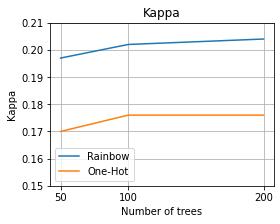

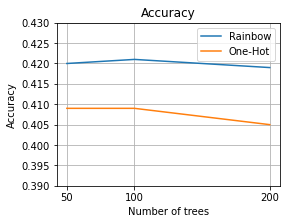

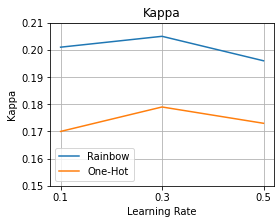

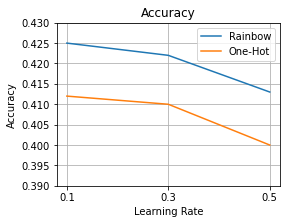

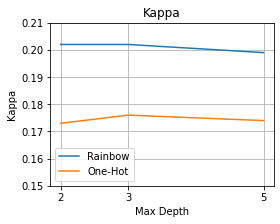

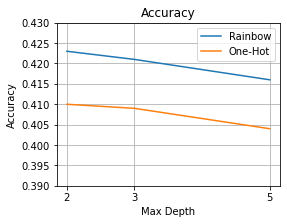

In [3]:
## THIS CODE WILL BE HIDDEN, OUTPUT WILL BE SHOWN - probably, as saved images
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def make_plot(t, feature_group, hyperparameter, hyperparameter_name, metric, ylimit_bottom, ylimit_top, xticks_list):
    k1 = pd.DataFrame(t[t['feature_group']==feature_group][t['transform_parameter']=='rainbow'].groupby(
        hyperparameter)[metric].mean().round(3))
    k2 = pd.DataFrame(t[t['feature_group']==feature_group][t['transform_parameter']=='one_hot'].groupby(
        hyperparameter)[metric].mean().round(3))
    fig, ax = plt.subplots(figsize=(4,3))
    plt.plot(k1.index, k1[metric], label = 'Rainbow')
    plt.plot(k2.index, k2[metric], label = 'One-Hot')
    plt.ylim(ylimit_bottom, ylimit_top)
    ax.set_xticks(xticks_list)
    plt.grid()
    plt.legend()
    plt.xlabel(hyperparameter_name)
    plt.ylabel(metric.capitalize())
    plt.title(metric.capitalize())
    plt.show()
    
make_plot(t, 'all', 'n_trees', 'Number of trees', 'kappa', 0.15, 0.21, [50, 100 ,200])
make_plot(t, 'all', 'n_trees', 'Number of trees', 'accuracy', 0.39, 0.43, [50, 100 ,200])
make_plot(t, 'all', 'eta', 'Learning Rate', 'kappa', 0.15, 0.21, [0.1, 0.3 ,0.5])
make_plot(t, 'all', 'eta', 'Learning Rate', 'accuracy', 0.39, 0.43, [0.1, 0.3 ,0.5])
make_plot(t, 'all', 'max_depth', 'Max Depth', 'kappa', 0.15, 0.21, [2, 3 ,5])
make_plot(t, 'all', 'max_depth', 'Max Depth', 'accuracy', 0.39, 0.43, [2, 3, 5])

<font color='red'>This should probably be a 2*3 plots matrix. <br> Also, other metrics? <br> Also, combinations of hyperparameters? Like max_depth =2, num_trees = 50, eta = 0.5 - the simplest model compare rainbow vs one_hot? <br> Any graphic representaiton of that? <br>
Any other ideas, Dmytro?
<br>
Maybe beautifying charts in some way? Other colors?</font>

Next, let's compare the runtime for each method. Average model running time is about 9 times faster for Rainbow method than for One-Hot. So, in addition to a substantial increase in model performance metrics, Rainbow method can save data scientists huge amount of time.

In [4]:
## THIS CODE WILL BE HIDDEN, OUTPUT WILL BE SHOWN - probably, as a manual mardown table
pd.DataFrame(t[t['feature_group']=='all'].groupby(['transform_parameter'])['total_time'].mean().round(3))

,total_time
transform_parameter,
one_hot,66.074
rainbow,7.444


<font color='red'>Same. Correct the table the necessary way</font>

### Interval, Ordinal, and Nominal

Below are the results of the models that applied two types of encoding to interval, ordinal, and nominal features separately.

In [5]:
## THIS CODE WILL BE HIDDEN, OUTPUT WILL BE SHOWN - probably, as a manual mardown table
t[t['feature_group']!='all'].groupby(['feature_group','transform_parameter'])[['accuracy', 'kappa']].mean().round(3)

accuracy  kappa
feature_group transform_parameter                 
interval      one_hot                 0.400  0.156
              rainbow                 0.415  0.189
nominal       one_hot                 0.394  0.154
              rainbow                 0.392  0.154
ordinal       one_hot                 0.378  0.111
              rainbow                 0.383  0.125

<font color='red'>Same. Correct the table the necessary way. <br>
Also, reorder: interval, ordinal, nominal.<br><br>
Add charts if needed <br>
Maybe, do something to show that kappa is better for all cases - some magic with nominal </font>

As expected, interval and ordinal features gain the most from Rainbow encoding, while nominal variables - less so.

### Feature Selection

Finally, to make a comparison more fair in terms of dimensionality, we picked top 10, top 50, and top 100 features from each feature set - Rainbow and One-Hot. We used feature importance attribute of the XGBoost model and aggregated feature importance scores for 4 cross validation folds on the best hyperparameter set for each encoding type. Below are the results.

In [6]:
## THIS CODE WILL BE HIDDEN, OUTPUT WILL BE SHOWN - probably, as a manual mardown table
d = pd.read_csv('rainbow_research_feature_selection.csv')
d.groupby(['feature_selection_parameter', 'transform_parameter'])[['accuracy', 'kappa']].mean().round(3)

accuracy  kappa
feature_selection_parameter transform_parameter                 
top_10                      one_hot                 0.395  0.150
                            rainbow                 0.412  0.190
top_100                     one_hot                 0.420  0.199
                            rainbow                 0.424  0.211
top_50                      one_hot                 0.418  0.198
                            rainbow                 0.424  0.207

<font color='red'>Obviously, reorder 10, 50, 100 <br>
Apply needed changes. </font>

Kappa is significantly higher for the Rainbow method, especially with the lower number of selected features.

## Conclusion

As shown above, the Rainbow method is an elegant and simple way to encode categorical variables, that will significantly reduce the data dimensionality without losing any part of valuable signal, that will likely cause substantial improvements in model performance metrics (or, at the very least, will not cause any reductions in metrics), and that will save great amount of time for modelers.

Finally, we should note that this article just opens the conversation about the Rainbow method, and by no means exhausts the topic. In the potential future investigations, we could explore some other aspects. To name a few: binary and continuous target variables; comparison with other dimensionality reduction methods, such as PCA; how missing values fit the Rainbow framework; is there any limit and implications of combining seemingly unrelated features into a single Rainbow. We hope to open the gate for further questions and feedback on this method.

## Bibliography